### this notebook is dedicated to the computation of global map of relative difference / trends of aerosol parameters in between two years both for an ENSEMBLE of models and observations

In [1]:
# modules importation
from trends_functions import *
import iris
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import cartopy.crs as ccrs
from warnings import filterwarnings
#filterwarnings('ignore')

In [2]:
# import seaborn style
sns.set()
sns.set_context("paper")
# sns.set_style("whitegrid")
sns.color_palette("muted")
# since each figure will be a subfigure, increase font_size
fscale = 1.2
sns.set(font_scale=fscale)

In [3]:
# computation parameters
params = get_params()

In [4]:
# run observations
# 'ang4487aer' 'od550aer' 'od550gt1aer' 'od550lt1aer' 'concpm10' 'concpm25' 'sconcso4'
var = 'od550aer'
params['kind'] = 'obs'
params = fill_params(params, var)
params['var'] = var
obs_source = params['source']
reader = pya.io.ReadUngridded(obs_source)
obs_data = reader.read(vars_to_retrieve=var)

In [5]:
### Map of relative difference in between two years

In [6]:
#varss = ['od550aer','concpm10']
varss = ['od550aer', 'od550lt1aer', 'od550gt1aer', 'ang4487aer', 'concpm10', 'concpm25', 'concso4', 'scatc550dryaer', 'absc550aer']
y1, y2 = 2000, 2014

In [7]:
'''nl, nc = 3, 3
fig, axs = plt.subplots(nl, nc, sharex='col', sharey='row', 
                       subplot_kw=dict(projection=ccrs.PlateCarree()),
                       gridspec_kw={
                           'wspace': 0.01,
                           'hspace': 0.01
                       })
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
il, ic = 0, 0

for var in varss:
    #get models from params
    params = fill_params(params, var)

    #for the models, set mon_dim to zero
    params['min_dim'] = 0
    mod_var = params['mod_var']

    mod_sources = params['models']
    
    if 'BCC-CUACE_HIST' in mod_sources:
        mod_sources.remove('BCC-CUACE_HIST')

    resol = 5
    lons = np.arange(-180, 180, resol)
    lats = np.arange(-90, 90, resol)
    sample_points = [('latitude',lats), ('longitude', lons)]

    MOD_DATA = []
    for mod_source in mod_sources:
        print(var,' - ',mod_source)
        params['source'] = mod_source

        #check if model in cache
        fn = 'cache/'+mod_source+'_'+var+'-'+str(resol)+'x'+str(resol)+'.pkl'
        if os.path.isfile(fn):
            # for reading also binary mode is important 
            pklfile = open(fn, 'rb')      
            mod_data = pickle.load(pklfile) 
            pklfile.close()
        else:
            reader = pya.io.ReadGridded(mod_source)
            mod_data = reader.read_var(mod_var, ts_type='daily')
            mod_data = mod_data.resample_time(to_ts_type='monthly')
            mod_data = mod_data.interpolate(sample_points,scheme='nearest')

            #write picke file in cache directory
            pklfile = open(fn, 'ab') 

            # source, destination 
            pickle.dump(mod_data, pklfile)                      
            pklfile.close()

        #put model data
        MOD_DATA.append(mod_data)
    
    #compute relative difference between y2 and y1
    DIFF = []
    nmod = 0
    
    for i, mod_data in enumerate(MOD_DATA):
        year_data = mod_data.resample_time(to_ts_type='yearly')
        years = [year.astype(object).year for year in year_data.time_stamps()]

        if y1 in years and y2 in years:
            iy1 = years.index(y1)
            iy2 = years.index(y2)
            diff = 100 * (year_data.cube[iy2,:,:] - year_data.cube[iy1,:,:]) / year_data.cube[iy2,:,:]
            if not diff.data.mask.all() == True:
                nmod+=1
                DIFF.append(diff.data)
    
    #compute the median of the differences
    med = np.median(DIFF, axis=0)
    
    ax = axs[il, ic]
    ax.coastlines(zorder=3)
    
    cmin, cmax = -80, 80
    if type(med)!=np.float64 and len(med)>0:
        im = ax.contourf(lons,lats,med,levels=np.arange(cmin,cmax+10,10),vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')

    #txt = ax.text(0.05,0.95,params['ylabel'],ha='left',va='top',transform=ax.transAxes,fontsize=16,fontweight='bold',zorder=10)
    #txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
    txt2 = ax.text(0.95,0.05,'n_mod: '+str(nmod),ha='right',va='bottom',transform=ax.transAxes,fontsize=12)
    txt2.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
    
    #remove axis
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(params['ylabel'], ha='left',fontweight='bold')
    

    #calculates next axis
    if ic<nc-1:
        ic+=1
    else:
        il+=1
        ic=0

#change size of the figure
# hide tick and tick label of the big axes
plt.tick_params(labelcolor=None, top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xticks([])
plt.yticks([])

fig.colorbar(im, ax=axs, orientation='horizontal', extend='both',fraction=0.046, pad=0.04)

fig.set_size_inches(16,10)
fig = plt.gcf()

#plt.title('Difference between '+str(y2)+' and '+str(y1))
plt.savefig('figs/diff_map.png', dpi=300, bbox_inches='tight')'''

"nl, nc = 3, 3\nfig, axs = plt.subplots(nl, nc, sharex='col', sharey='row', \n                       subplot_kw=dict(projection=ccrs.PlateCarree()),\n                       gridspec_kw={\n                           'wspace': 0.01,\n                           'hspace': 0.01\n                       })\n# add a big axes, hide frame\nfig.add_subplot(111, frameon=False)\nil, ic = 0, 0\n\nfor var in varss:\n    #get models from params\n    params = fill_params(params, var)\n\n    #for the models, set mon_dim to zero\n    params['min_dim'] = 0\n    mod_var = params['mod_var']\n\n    mod_sources = params['models']\n    \n    if 'BCC-CUACE_HIST' in mod_sources:\n        mod_sources.remove('BCC-CUACE_HIST')\n\n    resol = 5\n    lons = np.arange(-180, 180, resol)\n    lats = np.arange(-90, 90, resol)\n    sample_points = [('latitude',lats), ('longitude', lons)]\n\n    MOD_DATA = []\n    for mod_source in mod_sources:\n        print(var,' - ',mod_source)\n        params['source'] = mod_source\n\n

### first, get location of all observation station available for the different parameters

In [8]:
parameters = ['od550aer', 'concpm10', 'concso4', 'scatc550dryaer', 'absc550aer']

In [9]:
#read observations
OBS = {}

for i, var in enumerate(parameters):
    # computation parameters
    params = get_params()
    params['kind'] = 'obs'
    fill_params(params, var)

    params['var'] = var
    obs_source = params['source']
    reader = pya.io.ReadUngridded(obs_source)
    obs_data = reader.read(vars_to_retrieve=var)
    
    #compte the trend just to have filtering (300 points, ...)
    _, OBS[var], _ = process_trend(
        obs_data, params,
        plot=False, show_plot=False, save_plot=False, write_json=False
    )

no flags


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:999: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  df = df.resample('D', how='mean')


no flags
no flags ASIA station:  Zhongshan_UnivityDh
no flags NAMERICA station:  Yumaowknife_AuroraC NAMERICA station:  DRAGON_OLNES NAMERICA station:  Gaithersburg
no flags SAMERICA station:  Veracruz_MAX_MEXFOP
no flags NAFRICA station:  Zinder_DMNporttutea
region:  SAFRICA station:  Walvis_Bay_airport
Less than 7 points in selected period
no flags
no flags AUSTRALIA station:  Tinga_Tinganand_QLD


/home/augustinm/Dev/pyaerocom/pyaerocom/pyaerocom/helpers.py:520: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[how][invalid] = np.nan


/home/augustinm/Dev/pyaerocom/trends/scripts/trends_functions.py:958: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  ts = ts.resample('D', how='mean')


region:  ASIA station:  Petalling JayaI Gentésertrch Observatoryt
Less than 7 points in selected period
No station found in , SAFRICArraablo de los MontesCyprus Atmospheric Observatory
No station found in , AUSTRALIA
no flags WORLD station:  Zosenibodenntainstional Park-Lind Point (VI01)n5)tory
no flags EUROPE station:  Ähtäri I-III Dam)
no flags ASIA station:  TereljRataari (Vachiralongkorn Dam)
no flags NAMERICA station:  Zion_Canyon - Turtleback Domey_Run)
no flags SAMERICA station:  Virgin_Islands_NP
No station found in , SAFRICArrarrota
No station found in , AUSTRALIA
no flags
region:  ASIA station:  Gosanon-domospheric Research Observatoryt
Less than 7 points in selected period
region:  NAFRICA station:  Granadaiaillonainsderness3ain #1ment (GA09)WA99)5)
Less than 7 points in selected period
No station found in , AUSTRALIA Point
excluding moduletation:  Zeppelin mountain (Ny-Ålesund)1rvatoryA09)WA99)5)
excluding modulestation:  Ústí n.L.-mestoic Research Observatoryt
region:  ASI

### then plot the trends map, with mean over all grid-poiunts, and grid-points where an observation station is located

In [10]:
### computation of the trends with only one model
varss = ['od550aer', 'od550lt1aer', 'od550gt1aer', 'ang4487aer', 'concpm10', 'concpm25', 'concso4', 'scatc550dryaer', 'absc550aer']

In [11]:
def get_closest_coo(stat_lat, stat_lon, lats, lons):
    #this could be done with double list comprehension, but not trivial to pick right indexes afterwards
    #d2 = [(stat_lat-lat)**2+(stat_lon-lon)**2 for lat in lats for lon in lons]
    
    #initialize with large number
    min_d2 = 1e10
    
    #calculates the distance
    for i, lat in enumerate(lats):
        for j, lon in enumerate(lons):
            d2 = (stat_lat-lat)**2 + (stat_lon-lon)**2
            if d2<=min_d2:
                ilat, ilon = i, j
                min_d2 = d2
    return ilat, ilon, min_d2

od550aer  -  ECMWF_CAMS_REAN
35 / 36
od550lt1aer  -  GFDL-AM4-amip_HIST
35 / 36
od550gt1aer  -  GFDL-AM4-amip_HIST
35 / 36
ang4487aer  -  GFDL-AM4-amip_HIST
35 / 36
concpm10  -  ECMWF_CAMS_REAN
35 / 36
concpm25  -  ECMWF_CAMS_REAN
35 / 36
concso4  -  GEOS-i33p2_HIST
35 / 36
scatc550dryaer  -  None
absc550aer  -  None


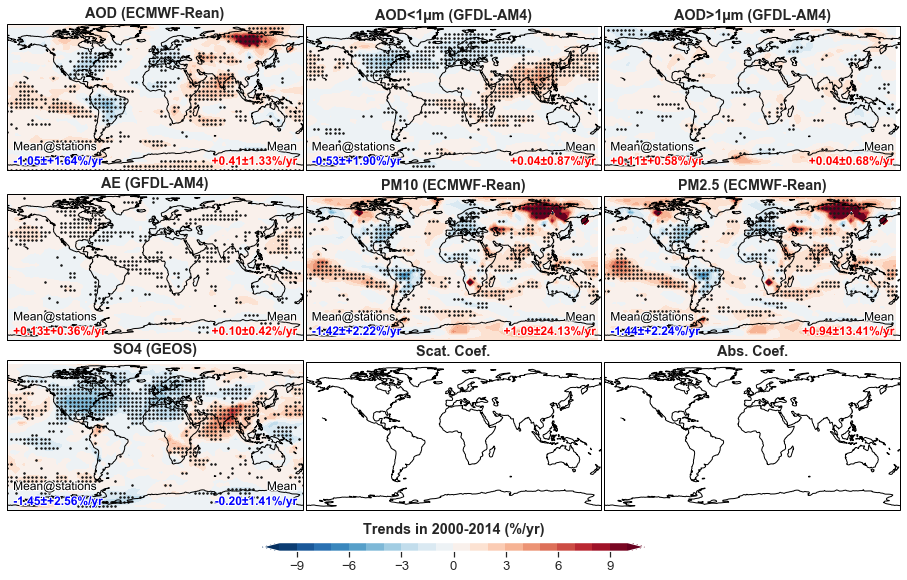

In [52]:
nl, nc = 3, 3
fig, axs = plt.subplots(nl, nc, sharex='col', sharey='row', 
                       subplot_kw=dict(projection=ccrs.PlateCarree()),
                       gridspec_kw={
                           'wspace': 0.01,
                           'hspace': 0.05
                       })
#add a big axes, hide frame
fig.add_subplot(111, frameon=False)
il, ic = 0, 0

for var in varss:
    
    #select available obs dataset
    if 'od550' in var or 'ang4487' in var:
        obs = OBS['od550aer']
    elif 'concpm' in var:
        obs = OBS['concpm10']
    elif 'concso4' in var:
        obs = OBS['concso4']
    elif 'scatc' in var:
        obs = OBS['scatc550dryaer']
    elif 'absc' in var:
        obs = OBS['absc550aer']
    
    params['kind'] = 'mod'
    #get models from params
    params = fill_params(params, var)
    #for the models, set mon_dim to zero
    params['min_dim'] = 0
    mod_var = params['mod_var']
    mod_source = params['ref_model']
    
    #we assume the pickles files are available
    resol = 5
    lons = np.arange(-180, 180, resol)
    lats = np.arange(-90, 90, resol)

    if var=='od550aer':
        mod_source = 'ECMWF_CAMS_REAN'
    print(var,' - ',mod_source)
    params['source'] = mod_source

    slopes, pvals = [], []
    if mod_source!=None:
        #check if model in cache
        fn = 'cache/'+mod_source+'_'+var+'-'+str(resol)+'x'+str(resol)+'.pkl'
        # for reading also binary mode is important 
        pklfile = open(fn, 'rb')      
        mod_data = pickle.load(pklfile) 
        pklfile.close()

        #average model data per year
        mod_data = mod_data.resample_time(to_ts_type='yearly')

        #initialize empty trends
        slopes = np.empty((np.shape(mod_data)[1],np.shape(mod_data)[2]))
        pvals = np.empty((np.shape(mod_data)[1],np.shape(mod_data)[2]))

        slopes[:] = np.nan
        pvals[:] = np.nan
        for ilat in np.arange((np.shape(mod_data)[1])):
            print(ilat,'/',np.shape(mod_data)[1], end="\r")
            for ilon in np.arange((np.shape(mod_data)[2])):
                x = np.array([int(str(date)[0:4]) for date in mod_data.time_stamps()])
                y = np.array(mod_data.data[:,ilat,ilon])

                #get indexes within period
                iok = [i for i, year in enumerate(x) if year>=y1 and year<=y2]
                x = x[iok]
                y = y[iok]

                if len(x)>2:
                    trend = compute_lin_trend(x, y, params)
                    slopes[ilat, ilon] = trend[params['period']]['rel_slp']
                    pvals[ilat, ilon] = trend[params['period']]['pval']
        print()
    
    #plot it
    ax = axs[il, ic]
    ax.coastlines(zorder=3)
    
    if len(slopes)>0 and not np.isnan(np.nanmean(slopes)):
        cmin, cmax = -10, 10
        if type(slopes)!=np.float64 and len(slopes)>0:
            im = ax.contourf(lons,lats,slopes,levels=np.arange(cmin,cmax+1,1),vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
            
            #add points where pvalue is lower than 0.1
            for ilon, lon in enumerate(lons):
                for ilat, lat in enumerate(lats):
                    if pvals[ilat, ilon]<=0.1:
                        ax.plot(lon, lat, 'k.', ms=3)

        ##add model name in lower right corner
        #txt_source = mod_source.split('_')[0]
        #txt_source = txt_source.split('-')[0]
        #txt2 = ax.text(0.05,0.05,txt_source,ha='left',va='bottom',transform=ax.transAxes,fontsize=12,fontweight='bold')
        #txt2.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])

        #add mean trend in lower left corner
        bgcolor = (1,1,1,0.0)
        mean_slope = np.nanmean(slopes)
        std_slope = np.nanstd(slopes)
        if mean_slope>0:
            fcolor = 'red'
        else:
            fcolor = 'blue'
        txt_source = '{:+4.2f}±{:4.2f}%/yr'.format(mean_slope, std_slope)
        txt = ax.text(0.98,0.12,'Mean',ha='right',va='bottom',transform=ax.transAxes,
                       fontsize=12,fontweight='normal',
                       color='black',backgroundcolor=bgcolor,
                       zorder=99
                      )
        txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
        txt2 = ax.text(0.98,0.02,txt_source,ha='right',va='bottom',transform=ax.transAxes,
                       fontsize=12,fontweight='bold',
                       color=fcolor,backgroundcolor=bgcolor,
                       zorder=99
                      )
        txt2.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
        #txt2.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
        
        #add mean trend@obs station in lower right corner
        slope_at_station = []
        for station in OBS['od550aer']['WORLD']['stations']:
            ilat, ilon, _ = get_closest_coo(station['lat'], station['lon'],lats, lons)
            slope_at_station.append(slopes[ilat, ilon])  
        mean_slope_at_station = np.nanmean(slope_at_station)
        std_slope_at_station = np.nanstd(slope_at_station)
        if mean_slope_at_station>0:
            fcolor = 'red'
        else:
            fcolor = 'blue'
        
        txt_source = '{:+4.2f}±{:+4.2f}%/yr'.format(mean_slope_at_station, std_slope_at_station)
        txt3 = ax.text(0.02,0.12,'Mean@stations',ha='left',va='bottom',transform=ax.transAxes,
                       fontsize=12,fontweight='normal',
                       color='black',backgroundcolor=bgcolor,
                       zorder=99
                      )
        txt3.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
        txt4 = ax.text(0.02,0.02,txt_source,ha='left',va='bottom',transform=ax.transAxes,
                       fontsize=12,fontweight='bold',
                       color=fcolor, backgroundcolor=bgcolor,
                       zorder=99
                      )
        txt4.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
        

        

    
    #remove axis
    ax.set_xticks([])
    ax.set_yticks([])
    if mod_source != None:
        ax.set_title(params['ylabel']+' ('+get_all_mods()[mod_source]['name']+')', ha='center',fontweight='bold')
    else:
        ax.set_title(params['ylabel'], ha='center',fontweight='bold')
    

    #calculates next axis
    if ic<nc-1:
        ic+=1
    else:
        il+=1
        ic=0
        
#change size of the figure
# hide tick and tick label of the big axes
plt.tick_params(labelcolor=None, top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xticks([])
plt.yticks([])

#set colorbar
cbar = fig.colorbar(im, ax=axs, orientation='horizontal', extend='both',fraction=0.016, pad=0.06, aspect=40)
cbar.ax.set_xlabel('Trends in 2000-2014 (%/yr)', fontweight='bold', labelpad=-50)

fig.set_size_inches(16,10)
fig = plt.gcf()

#plt.title('Difference between '+str(y2)+' and '+str(y1))
plt.savefig('figs/trends_map.png', dpi=300, bbox_inches='tight')